## Install libaries and dependencies

In [0]:
!pip install geopy

In [0]:
import geopy
import pandas as pd
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.getcwd()

'/content'

## Read csv into dataframe

In [0]:
# df = pd.read_csv('/content/drive/My Drive/2018-citibike-tripdata-nyc-combined.csv')
df = pd.read_csv('/content/drive/My Drive/2018-citibike-tripdata-nyc-combined-processed-20200101.csv')

## Get dimensions and head of dataframe

In [0]:
df.shape

(14060571, 17)

In [0]:
df.groupby('start station name').agg('start station latitude').mean()

start station name
1 Ave & E 110 St                40.792327
1 Ave & E 16 St                 40.732219
1 Ave & E 18 St                 40.733812
1 Ave & E 30 St                 40.741444
1 Ave & E 44 St                 40.750020
                                  ...    
Wyckoff St & Bond St            40.684617
Wythe Ave & Metropolitan Ave    40.716887
Yankee Ferry Terminal           40.686931
York St & Jay St                40.701485
old - E 13 St & Avenue A        40.729554
Name: start station latitude, Length: 815, dtype: float64

In [0]:
df_stations = df[['start station name', 'start station latitude', 'start station longitude']]
df_stations = df_stations.drop_duplicates()
# df_stations.head()
df_stations = df_stations.sort_values(by='start station name')

In [0]:
df_stations.head()
# df_stations.count()

,start station name,start station latitude,start station longitude
520627,1 Ave & E 110 St,40.792327,-73.938300
286034,1 Ave & E 16 St,40.732219,-73.981656
348124,1 Ave & E 18 St,40.733812,-73.980544
335263,1 Ave & E 30 St,40.741444,-73.975361
207399,1 Ave & E 44 St,40.750020,-73.969053


In [0]:
from geopy.geocoders import Nominatim

In [0]:
n = Nominatim(user_agent="geopy2.johnprester@neverbox.com")
test = n.geocode("40.7429, -73.9892")
test

Location(40/40 Club, 16, General Worth Square, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States of America, (40.7429866, -73.9892747, 0.0))

In [0]:
def get_zipcode_start(row):
  coords = f"{row['start station latitude']}, {row['start station longitude']}"
  # coords = f"{row.loc('start station latitude')}, {row.loc('start station longitude')}"
  n = Nominatim(user_agent="geopy.johnprester@neverbox.com")
  # raw = n.geocode(coords).raw
  location = n.geocode(coords)
  zipcode_start = location.raw['display_name'].split(',')[-2]
  return zipcode_start

In [0]:
# df_stations['zip_code'] = df_stations.apply(get_zipcode_start, axis=1)
df_stations.head(100)

,start station name,start station latitude,start station longitude,zip_code
520627,1 Ave & E 110 St,40.792327,-73.938300,10029
286034,1 Ave & E 16 St,40.732219,-73.981656,10009
348124,1 Ave & E 18 St,40.733812,-73.980544,10009
335263,1 Ave & E 30 St,40.741444,-73.975361,10002-1013
207399,1 Ave & E 44 St,40.750020,-73.969053,10017-6927
...,...,...,...,...
538291,44 Dr & 21 St,40.748000,-73.946093,11101
381727,44 Dr & Jackson Ave,40.747182,-73.943264,11101
381518,45 Rd & 11 St,40.747086,-73.949772,11101
381321,46 Ave & 5 St,40.747310,-73.954510,11101


In [0]:
df_stations.to_csv('/content/drive/My Drive/citibike_stations_zip_codes.csv', index=False)

In [0]:
# df.head(10)

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,26
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,49
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,62
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,44
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,26
5,1602,2018-01-01 21:31:54.1920,2018-01-01 21:58:36.3530,72,W 52 St & 11 Ave,40.767272,-73.993929,482,W 15 St & 7 Ave,40.739355,-73.999318,30106,Subscriber,1968,1,26.700000,50
6,722,2018-01-02 07:54:53.6460,2018-01-02 08:06:55.8720,72,W 52 St & 11 Ave,40.767272,-73.993929,228,E 48 St & 3 Ave,40.754601,-73.971879,32059,Subscriber,1978,1,12.033333,40
7,434,2018-01-02 08:06:14.3310,2018-01-02 08:13:28.7670,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760683,-73.984527,30525,Subscriber,1983,1,7.233333,35
8,366,2018-01-02 08:10:15.2550,2018-01-02 08:16:21.8960,72,W 52 St & 11 Ave,40.767272,-73.993929,479,9 Ave & W 45 St,40.760193,-73.991255,27439,Subscriber,1974,1,6.100000,44
9,324,2018-01-02 08:13:30.8960,2018-01-02 08:18:55.1200,72,W 52 St & 11 Ave,40.767272,-73.993929,450,W 49 St & 8 Ave,40.762272,-73.987882,30892,Subscriber,1947,1,5.400000,71


In [0]:
df.count()

tripduration_seconds       14060571
starttime                  14060571
stoptime                   14060571
start station id           14060571
start station name         14060571
start station latitude     14060571
start station longitude    14060571
end station id             14060571
end station name           14060571
end station latitude       14060571
end station longitude      14060571
bikeid                     14060571
usertype                   14060571
birth year                 14060571
gender                     14060571
tripduration_minutes       14060571
age                        14060571
dtype: int64

In [0]:
df.isnull().sum()

tripduration_seconds       0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
tripduration_minutes       0
age                        0
dtype: int64

## DROP ANY ROWS WITH NULL VALUES

In [0]:
df = df.dropna(axis = 0, how ='any') 

# comparing sizes of data frames 
# print("Old data frame length:", len(df), "\nNew data frame length:",  
#        len(df2), "\nNumber of rows with at least 1 NA value: ", 
#        (len(df)-len(df2))) 

In [0]:
df.shape

(17545842, 15)

In [0]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## DROP OLD PEOPLE

In [0]:
len(df2[(df2['birth year']>1884) & (df2['birth year']<1918)])

11147

In [0]:
len(df2[(df2['birth year']>1928) & (df2['birth year']<1939)])

8881

In [0]:
print(8881/len(df2))

0.0005061598069787702


In [0]:
len(df2[(df2['birth year']>1938) & (df2['birth year']<1949)])

119353

In [0]:
print(119353/len(df2))

0.0068023523749957395


In [0]:
len(df2[(df2['birth year']>1948) & (df2['birth year']<1959)])

801550

In [0]:
print(801550/len(df2))

0.04568318807384678


In [0]:
print(len(df2[df2['birth year']<1937]))
print(len(df2[df2['birth year']<1937])/len(df2))

18274
0.0010415003167132133


In [0]:
print(len(df2[df2['birth year']>1937]))
print(len(df2[df2['birth year']>1937])/len(df2))

17525144
0.9988203472936779


## DROP Riders >80 years old

In [0]:
df = df[df['birth year']>1937]
df.shape

(17525144, 15)

In [0]:
# df.head()
df.count()

tripduration               17525144
starttime                  17525144
stoptime                   17525144
start station id           17525144
start station name         17525144
start station latitude     17525144
start station longitude    17525144
end station id             17525144
end station name           17525144
end station latitude       17525144
end station longitude      17525144
bikeid                     17525144
usertype                   17525144
birth year                 17525144
gender                     17525144
dtype: int64

In [0]:
sorted(df['birth year'].unique())

[1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002]

In [0]:
df['start station longitude'].unique()

array([-73.99392888, -74.00666661, -74.00016545, -73.97632328,
       -73.97803415, -73.95928168, -74.00674436, -74.00297088,
       -73.99337909, -73.98068914, -74.0091059 , -73.98085795,
       -73.99724901, -74.00910627, -73.99612349, -73.99810231,
       -73.97032517, -73.97604882, -73.99456405, -73.98452729,
       -73.97738662, -74.01043382, -74.00681753, -73.99548059,
       -73.99383605, -73.99994661, -73.97187885, -73.99379025,
       -73.99014892, -73.98713956, -73.98672378, -74.00859207,
       -73.9813018 , -73.97493121, -73.973736  , -73.979382  ,
       -73.96536851, -73.97703874, -74.00483091, -74.00771779,
       -74.0090009 , -73.99480012, -73.99852205, -73.99453948,
       -73.99800419, -74.00247214, -73.96885458, -74.01234218,
       -74.01167797, -73.98362464, -73.9737299 , -74.00731853,
       -73.99147535, -73.97574813, -73.98765428, -73.99973337,
       -73.97178913, -73.976682  , -73.96563307, -74.0104554 ,
       -73.98476437, -74.00167   , -73.99510132, -73.97

In [0]:
df.groupby('start station name').count()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station name,,,,,,,,,,,,,,
1 Ave & E 110 St,10876,10876,10876,10876,10876,10876,10876,10876,10876,10876,10876,10876,10876,10876
1 Ave & E 16 St,67367,67367,67367,67367,67367,67367,67367,67367,67367,67367,67367,67367,67367,67367
1 Ave & E 18 St,47995,47995,47995,47995,47995,47995,47995,47995,47995,47995,47995,47995,47995,47995
1 Ave & E 30 St,42613,42613,42613,42613,42613,42613,42613,42613,42613,42613,42613,42613,42613,42613
1 Ave & E 44 St,29496,29496,29496,29496,29496,29496,29496,29496,29496,29496,29496,29496,29496,29496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyckoff St & Bond St,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Wythe Ave & Metropolitan Ave,33661,33661,33661,33661,33661,33661,33661,33661,33661,33661,33661,33661,33661,33661
Yankee Ferry Terminal,7881,7881,7881,7881,7881,7881,7881,7881,7881,7881,7881,7881,7881,7881


## DROP SHORT TRIPS
* Trip under 90 seconds?
* Start station ID is same as End Station ID?

In [0]:
df[df['start station id'] == df['end station id']].head()


,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age


In [0]:
df[df['start station id'] == df['end station id']].count()

tripduration_seconds       0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
tripduration_minutes       0
age                        0
dtype: int64

In [0]:
df[(df['start station id'] == df['end station id']) & (df['tripduration_seconds'] < 600)].count()
# df[(df['start station id'] != df['end station id']) & (df['tripduration'] > 300)].count()
# df[(df['start station id'] != df['end station id']) & (df['tripduration'] > 300)].head()
# df = df[(df['start station id'] != df['end station id']) & (df['tripduration'] > 300)]
# df.head(10)

tripduration_seconds       0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
tripduration_minutes       0
age                        0
dtype: int64

In [0]:
# df[df['tripduration_seconds'] < 600].count()
df[df['tripduration_minutes'] < 10].count()


tripduration_seconds       5447522
starttime                  5447522
stoptime                   5447522
start station id           5447522
start station name         5447522
start station latitude     5447522
start station longitude    5447522
end station id             5447522
end station name           5447522
end station latitude       5447522
end station longitude      5447522
bikeid                     5447522
usertype                   5447522
birth year                 5447522
gender                     5447522
tripduration_minutes       5447522
age                        5447522
dtype: int64

In [0]:
df.shape

(14060571, 15)

## Random sample of data set

In [0]:
df = df.sample(frac=0.85, random_state=42)
df.shape

(14896372, 15)

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
2083496,974,2018-03-30 13:42:43.8670,2018-03-30 13:58:57.8890,513.0,W 56 St & 10 Ave,40.768254,-73.988639,526.0,E 33 St & 5 Ave,40.747659,-73.984907,26130,Subscriber,1960,1
13271581,1542,2018-09-29 11:19:40.3860,2018-09-29 11:45:23.3450,3136.0,5 Ave & E 63 St,40.766368,-73.971518,3143.0,5 Ave & E 78 St,40.776321,-73.964274,33904,Customer,1987,2
4162743,1583,2018-05-14 08:17:06.9990,2018-05-14 08:43:30.5120,326.0,E 11 St & 1 Ave,40.729538,-73.984267,72.0,W 52 St & 11 Ave,40.767272,-73.993929,30044,Subscriber,1974,1
6993303,899,2018-06-16 17:03:09.5990,2018-06-16 17:18:09.1220,3141.0,1 Ave & E 68 St,40.765005,-73.958185,359.0,E 47 St & Park Ave,40.755103,-73.974987,15162,Subscriber,1957,2
11160088,1493,2018-08-26 15:29:51.4020,2018-08-26 15:54:45.3990,3449.0,Eckford St & Engert Ave,40.721463,-73.948009,3112.0,Milton St & Franklin St,40.729060,-73.957790,34009,Customer,1946,1


## change column name

In [0]:
df.rename(columns={'tripduration':'tripduration_seconds'}, inplace=True)
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


## Duration Minutes

In [0]:
df['tripduration_minutes'] = df['tripduration_seconds'].map(lambda x: x/60)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000


## AGE
---
* NB based on 2018!


In [0]:
df['age'] = df['birth year'].map(lambda x: 2018-x)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,26
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,49
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,62
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,44
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,26


## Cast station IDs to integers

In [0]:
df['start station id'] = df['start station id'].astype(int)
df['end station id'] = df['end station id'].astype(int)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,26
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,49
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,62
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,44
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,26


In [0]:
df.shape

(14060571, 17)

In [0]:
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,26
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,49
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,62
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,44
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,26


In [0]:
df.to_csv('/content/drive/My Drive/2018-citibike-tripdata-nyc-combined-processed-20200101.csv', index=False)

## Zip Code

In [0]:
from geopy.geocoders import Nominatim

In [0]:
n = Nominatim(user_agent="geopy2.johnprester@neverbox.com")
test = n.geocode("40.7429, -73.9892")
# df['coordinates'] = df['city'].apply(n.geocode)
# df['latitude'] = df['coordinates'].apply(lambda x: x.latitude)
# df['longitude'] = df['coordinates'].apply(lambda x: x.longitude)
# df

In [0]:
test

Location(40/40 Club, 16, General Worth Square, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States of America, (40.7429866, -73.9892747, 0.0))

In [0]:
def get_zipcode_start(row):
  coords = f"{row['start station latitude']}, {row['start station longitude']}"
  # coords = f"{row.loc('start station latitude')}, {row.loc('start station longitude')}"
  n = Nominatim(user_agent="geopy.johnprester@neverbox.com")
  # raw = n.geocode(coords).raw
  location = n.geocode(coords)
  zipcode_start = location.raw['display_name'].split(',')[-2]
  return zipcode_start

In [0]:
def get_zipcode_end(row):
  coords = f"{row['end station latitude']}, {row['end station longitude']}"
  n = Nominatim(user_agent="geopy.johnprester@neverbox.com")
  # raw = n.geocode(coords).raw
  location = n.geocode(coords)
  zipcode_end = location.raw['display_name'].split(',')[-2]
  return zipcode_end

In [0]:
df_test = df.head(20)
df_test.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,26
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,49
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,62
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,44
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,26


In [0]:
# df_test['zipcode_start'] = df_test.apply(get_zipcode_start, axis=1)
# df_test.apply(get_zipcode_start, axis=1)
df_test.loc['zipcode_start'] = df_test.apply(get_zipcode_start, axis=1)
df_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,age
0,970.0,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956.0,Subscriber,1992.0,1.0,16.166667,26.0
1,723.0,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536.0,Subscriber,1969.0,1.0,12.050000,49.0
2,496.0,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069.0,Subscriber,1956.0,1.0,8.266667,62.0
3,306.0,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781.0,Subscriber,1974.0,1.0,5.100000,44.0
4,306.0,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319.0,Subscriber,1992.0,1.0,5.100000,26.0


In [0]:
df['zipcode_start'] = df.apply(get_zipcode_start, axis=1)
df.head()

GeocoderServiceError: ignored

In [0]:
test

Location(New York, United States of America, (40.7127281, -74.0060152, 0.0))

In [0]:
test.latitude

40.7127281

In [0]:
test.address

'New York, United States of America'

In [0]:
test2 = n.geocode('40.768254, -73.988639') 

In [0]:
test2

Location(455, West 56th Street, Midtown, Manhattan Community Board 5, Manhattan, New York County, New York, 10019, United States of America, (40.76842845, -73.988560098316, 0.0))

In [0]:
test2.raw['display_name'].split(',')[-2]

' 10019'

In [0]:
test3 = n.geocode('30.2672, -97.7431')

In [0]:
test3.raw

{'boundingbox': ['30.2670401', '30.2675384', '-97.742942', '-97.7423087'],
 'class': 'building',
 'display_name': 'Bank of America Building, 501, Congress Avenue, Downtown, Austin, Travis County, Texas, 78701, United States',
 'importance': 0.001,
 'lat': '30.2672856',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-97.7426290054977',
 'osm_id': 99725035,
 'osm_type': 'way',
 'place_id': 97832464,
 'type': 'yes'}

In [0]:
test3.raw['display_name'].split(',')[-2]

' 78701'

In [0]:
str "{1], {2}".format()

## Calculate distance

In [0]:
import geopy.distance

In [0]:
def calc_distance_miles(row):
  coords_1 = (row["start station latitude"], row["start station longitude"])
  # coords_1 = (row["start station latitude"], row["start station longitude"])
  coords_2 = (row["end station latitude"], row["end station longitude"])
  # coords_2 = (row["end station latitude"], row["end station longitude"])
  return(geopy.distance.distance(coords_1, coords_2).miles)

In [0]:
df["trip_distance_miles"] = df.apply(calc_distance_miles, axis=1)
df.head()

In [0]:
df['start_station_latlng'] = df['start station latitude'].astype(str) + ", " + df['start station longitude'].astype(str)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripduration_minutes,start_station_latlng
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,26,16.166667,"40.76727216, -73.99392888"
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,49,12.050000,"40.76727216, -73.99392888"
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,62,8.266667,"40.76727216, -73.99392888"
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,44,5.100000,"40.76727216, -73.99392888"
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,26,5.100000,"40.76727216, -73.99392888"


In [0]:
df['end_station_latlng'] = df['end station latitude'].astype(str) + ", " + df['end station longitude'].astype(str)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripduration_minutes,start_station_latlng,end_station_latlng
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,26,16.166667,"40.76727216, -73.99392888","40.74901271, -73.98848395"
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,49,12.050000,"40.76727216, -73.99392888","40.7505853470215, -73.9946848154068"
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,62,8.266667,"40.76727216, -73.99392888","40.75594159, -74.0021163"
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,44,5.100000,"40.76727216, -73.99392888","40.76370739, -73.9851615"
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,26,5.100000,"40.76727216, -73.99392888","40.7746671, -73.98470567"


In [0]:
def calc_distance_miles(row):
  return(geopy.distance.distance(df['start_station_latlng'], df['end_station_latlng']).miles)

In [0]:
# df["trip_distance"] = df.apply(calc_distance_miles, axis=1)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripduration_minutes,start_station_latlng,end_station_latlng
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,26,16.166667,"40.76727216, -73.99392888","40.74901271, -73.98848395"
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,49,12.050000,"40.76727216, -73.99392888","40.7505853470215, -73.9946848154068"
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,62,8.266667,"40.76727216, -73.99392888","40.75594159, -74.0021163"
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,44,5.100000,"40.76727216, -73.99392888","40.76370739, -73.9851615"
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,26,5.100000,"40.76727216, -73.99392888","40.7746671, -73.98470567"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f180f67e2e8>]],
      dtype=object)

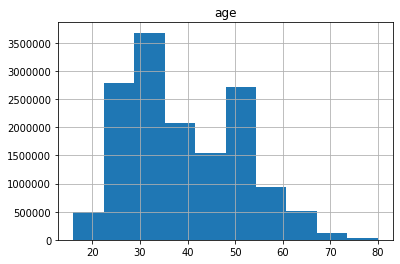

In [0]:
df_sample.hist(column='age')

In [0]:
df_age = df.groupby(['age']).count()['bikeid']

In [0]:
df_age

age
16       6930
17      23544
18      49810
19      82262
20     107185
        ...  
129        55
130       745
131       811
132       315
133       282
Name: bikeid, Length: 109, dtype: int64

In [0]:
df.to_csv('2018_citibike_tripdata_nyc')

In [0]:
pd.options.display.max_rows = 500

In [0]:
df.groupby('age').count()[['bikeid']]

,bikeid
age,
16,6930
17,23544
18,49810
19,82262
20,107185
21,140375
22,179743
23,308734
24,428197


In [0]:
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripduration_minutes,start_station_latlng,end_station_latlng
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,26,16.166667,"40.76727216, -73.99392888","40.74901271, -73.98848395"
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,49,12.050000,"40.76727216, -73.99392888","40.7505853470215, -73.9946848154068"
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,62,8.266667,"40.76727216, -73.99392888","40.75594159, -74.0021163"
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,44,5.100000,"40.76727216, -73.99392888","40.76370739, -73.9851615"
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,26,5.100000,"40.76727216, -73.99392888","40.7746671, -73.98470567"


In [0]:
def calc_distance_miles2(row):
    coords_1 = (row["start station latitude"], row["start station longitude"])
    coords_2 = (row["end station latitude"],row["end station longitude"])
    return geopy.distance.distance(coords_1, coords_2).miles

In [0]:
df["tripdistance_miles"] = df.apply(calc_distance_miles2, axis=1)
df.head()

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripduration_minutes,start_station_latlng,end_station_latlng,tripdistance_miles
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,26,16.166667,"40.76727216, -73.99392888","40.74901271, -73.98848395",1.291938
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,49,12.050000,"40.76727216, -73.99392888","40.7505853470215, -73.9946848154068",1.152120
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,62,8.266667,"40.76727216, -73.99392888","40.75594159, -74.0021163",0.892080
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,44,5.100000,"40.76727216, -73.99392888","40.76370739, -73.9851615",0.521613
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,26,5.100000,"40.76727216, -73.99392888","40.7746671, -73.98470567",0.703197


In [0]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

start station id      2497
start station name    2497
end station id        2497
end station name      2497
dtype: int64

In [0]:
df.index

RangeIndex(start=0, stop=17548339, step=1)

In [0]:
df.to_csv('/content/drive/My Drive/2018-citibike-tripdata-nyc-combined-1.csv', index=False)

# TEST

In [0]:
df[df['birth year'] == 1969].count()

tripduration_seconds       1460561
starttime                  1460561
stoptime                   1460561
start station id           1460561
start station name         1460561
start station latitude     1460561
start station longitude    1460561
end station id             1460561
end station name           1460561
end station latitude       1460561
end station longitude      1460561
bikeid                     1460561
usertype                   1460561
birth year                 1460561
gender                     1460561
tripduration_minutes       1460561
age                        1460561
dtype: int64

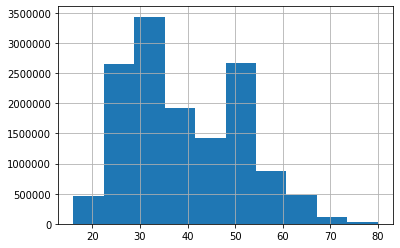

In [0]:
df['age'].hist()

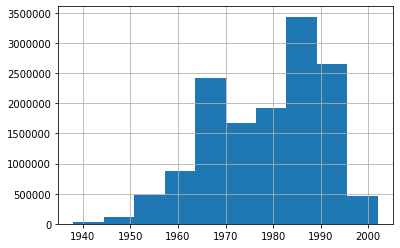

In [0]:
df['birth year'].hist()

In [0]:
pd.set_option('display.max_rows', 500)

In [0]:
df.groupby('age').agg('count')

,tripduration_seconds,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes
age,,,,,,,,,,,,,,,,
16,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541,5541
17,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868,17868
18,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434,36434
19,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890,61890
20,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954,82954
21,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373,110373
22,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375,146375
23,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235,252235
24,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079,350079
